<a href="https://colab.research.google.com/github/Waseem7839/Network-Denial-of-Service-Detection/blob/main/CAPSTONE_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec

In [ ]:
train = pd.read_csv("/content/NSL_KDD_TRAIN.csv")
test = pd.read_csv("/content/NSL_KDD_TEST.csv")
train.isnull().sum()
print(train.isnull().all())
train.drop(columns='level',axis=1, inplace=True )

duration                       False
protocol_type                  False
service                        False
flag                           False
src_bytes                      False
dst_bytes                      False
land                           False
wrong_fragment                 False
urgent                         False
hot                            False
num_failed_logins              False
logged_in                      False
num_compromised                False
root_shell                     False
su_attempted                   False
num_root                       False
num_file_creations             False
num_shells                     False
num_access_files               False
num_outbound_cmds              False
is_host_login                  False
is_guest_login                 False
count                          False
srv_count                      False
serror_rate                    False
srv_serror_rate                False
rerror_rate                    False
s

In [ ]:
attack_n = []
for i in train['class'] :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
train['class'] = attack_n

print(train.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [ ]:
protocol_n = []
for i in train.protocol_type :
  if i == 'tcp':
    protocol_n.append(0)
  elif i == 'udp':
    protocol_n.append(1)
  else:
    protocol_n.append(2)
train['protocol_type'] = protocol_n

In [ ]:
protocol_n = []
for i in train.protocol_type :
  if i == 'tcp':
    protocol_n.append(0)
  elif i == 'udp':
    protocol_n.append(1)
  else:
    protocol_n.append(2)
train['protocol_type'] = protocol_n


In [ ]:
flag_n = []
for i in train.flag:
  if i == 'SF':
    flag_n.append(0)
  elif i == 'S0':
    flag_n.append(1)
  elif i == 'REJ':
    flag_n.append(2)
  elif i == 'RSTR':
    flag_n.append(3)
  elif i == 'SH':
    flag_n.append(4)
  elif i == 'RSTO':
    flag_n.append(5)
  elif i == 'S1':
    flag_n.append(6)
  elif i == 'RSTOS0':
    flag_n.append(7)
  elif i == 'S3':
    flag_n.append(8)
  elif i == 'S2':
    flag_n.append(9)
  elif i == 'OTH':
    flag_n.append(10)
  else:
    flag_n.append(11)

train['flag'] = flag_n


In [ ]:
service_n = []
for i in train.service:
  if i == 'ftp_data':
    service_n.append(0)
  elif i == 'other':
    service_n.append(1)
  elif i == 'private':
    service_n.append(2)
  elif i == 'http':
    service_n.append(3)
  elif i == 'remote_job':
    service_n.append(4)
  elif i == 'name':
    service_n.append(5)
  elif i == 'netbios_ns':
    service_n.append(6)
  elif i == 'eco_i':
    service_n.append(7)
  elif i == 'mtp':
    service_n.append(8)
  elif i == 'telnet':
    service_n.append(9)
  elif i == 'finger':
    service_n.append(10)
  elif i == 'domain_u':
    service_n.append(11)
  elif i == 'supdup':
    service_n.append(12)
  elif i == 'uucp_path':
    service_n.append(13)
  elif i == 'Z39_50':
    service_n.append(14)
  elif i == 'smtp':
    service_n.append(15)
  elif i == 'csnet_ns':
    service_n.append(16)
  elif i == 'uucp':
    service_n.append(17)
  elif i == 'netbios_dgm':
    service_n.append(18)
  elif i == 'urp_i':
    service_n.append(19)
  elif i == 'auth':
    service_n.append(20)
  elif i == 'domain':
    service_n.append(21)
  elif i == 'ftp':
    service_n.append(22)
  elif i == 'bgp':
    service_n.append(23)
  elif i == 'ldap':
    service_n.append(24)
  elif i == 'ecr_i':
    service_n.append(25)
  elif i == 'gopher':
    service_n.append(26)
  elif i == 'vmnet':
    service_n.append(27)
  elif i == 'systat':
    service_n.append(28)
  elif i == 'http_443':
    service_n.append(29)
  elif i == 'efs':
    service_n.append(30)
  elif i == 'whois':
    service_n.append(31)
  elif i == 'imap4':
    service_n.append(32)
  elif i == 'iso_tsap':
    service_n.append(33)
  elif i == 'echo':
    service_n.append(34)
  elif i == 'klogin':
    service_n.append(35)
  elif i == 'link':
    service_n.append(36)
  elif i == 'sunrpc':
    service_n.append(37)
  elif i == 'login':
    service_n.append(38)
  elif i == 'kshell':
    service_n.append(39)
  elif i == 'sql_net':
    service_n.append(40)
  elif i == 'time':
    service_n.append(41)
  elif i == 'hostnames':
    service_n.append(42)
  elif i == 'exec':
    service_n.append(43)
  elif i == 'ntp_u':
    service_n.append(44)
  elif i == 'discard':
    service_n.append(45)
  elif i == 'nntp':
    service_n.append(46)
  elif i == 'courier':
    service_n.append(47)
  elif i == 'ctf':
    service_n.append(48)
  elif i == 'ssh':
    service_n.append(49)
  elif i == 'daytime':
    service_n.append(50)
  elif i == 'shell':
    service_n.append(51)
  elif i == 'netstat':
    service_n.append(52)
  elif i == 'pop_3':
    service_n.append(53)
  elif i == 'nnsp':
    service_n.append(54)
  elif i == 'IRC':
    service_n.append(55)
  elif i == 'pop_2':
    service_n.append(56)
  elif i == 'printer':
    service_n.append(57)
  elif i == 'tim_i':
    service_n.append(58)
  elif i == 'pm_dump':
    service_n.append(59)
  elif i == 'red_i':
    service_n.append(60)
  elif i == 'netbios_ssn':
    service_n.append(61)
  elif i == 'rje':
    service_n.append(62)
  elif i == 'X11':
    service_n.append(63)
  elif i == 'urh_i':
    service_n.append(64)
  elif i == 'http_8001':
    service_n.append(65)
  elif i == 'aol':
    service_n.append(66)
  elif i == 'http_2784':
    service_n.append(67)
  elif i == 'tftp_u':
    service_n.append(68)
  elif i == 'harvest':
    service_n.append(69)
  else:
    service_n.append(70)

train['service'] = service_n


In [ ]:
attack_n = []
for i in train['class'] :
  if i == 'normal':
    attack_n.append(0)
  else:
    attack_n.append(1)
train['class'] = attack_n


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE


In [ ]:
cols =train.columns
X = train[cols]
y = train['class']
# Build a logreg and compute the feature importances
model=LogisticRegression(max_iter=13000 )


In [ ]:
# create the RFE model and select 8 attributes
rfe = RFE(model)


In [ ]:
rfe = rfe.fit(X, y)

In [ ]:
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))


Selected features: ['wrong_fragment', 'logged_in', 'num_compromised', 'root_shell', 'num_root', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']


In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(max_iter=13000), step=1, cv=10, scoring='accuracy')


In [ ]:
rfecv.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr

RFECV(cv=10, estimator=LogisticRegression(max_iter=13000), scoring='accuracy')

In [ ]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))


Optimal number of features: 1
Selected features: ['class']


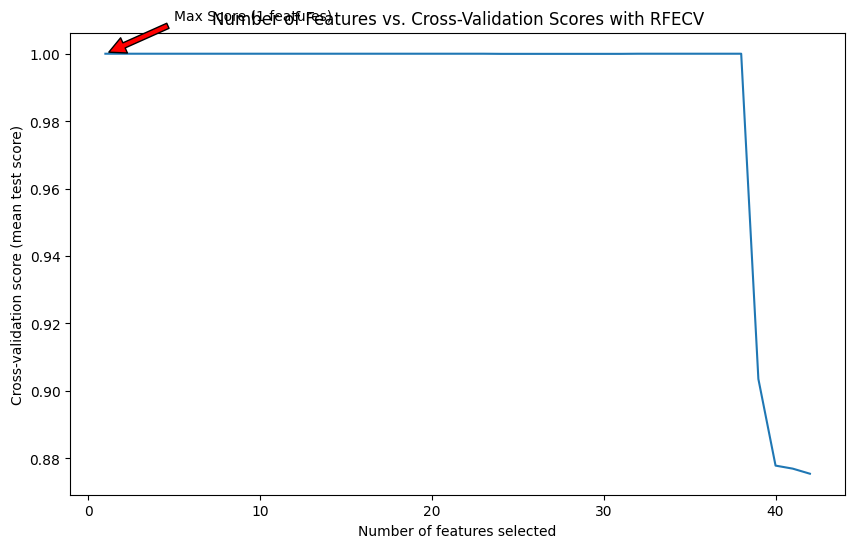

In [ ]:
# Plot number of features VS. cross-validation scores
import numpy as np
import matplotlib.pyplot as plt

# Your existing code
plt.figure(figsize=(10, 6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (mean test score)")

# Use rfecv.cv_results_ instead of rfecv.grid_scores_
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])

# Additional suggestions
plt.title('Number of Features vs. Cross-Validation Scores with RFECV')

max_score_index = np.argmax(rfecv.cv_results_['mean_test_score'])
plt.annotate(f'Max Score ({max_score_index+1} features)',
             xy=(max_score_index+1, rfecv.cv_results_['mean_test_score'][max_score_index]),
             xytext=(max_score_index+5, rfecv.cv_results_['mean_test_score'][max_score_index] + 0.01),
             arrowprops=dict(facecolor='red', shrink=0.05),
             )

plt.show()


In [ ]:
Selected_features = ['protocol_type', 'wrong_fragment', 'num_compromised', 'root_shell', 'num_root', 'num_shells', 'is_guest_login', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'dst_host_same_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']
X = train[Selected_features]


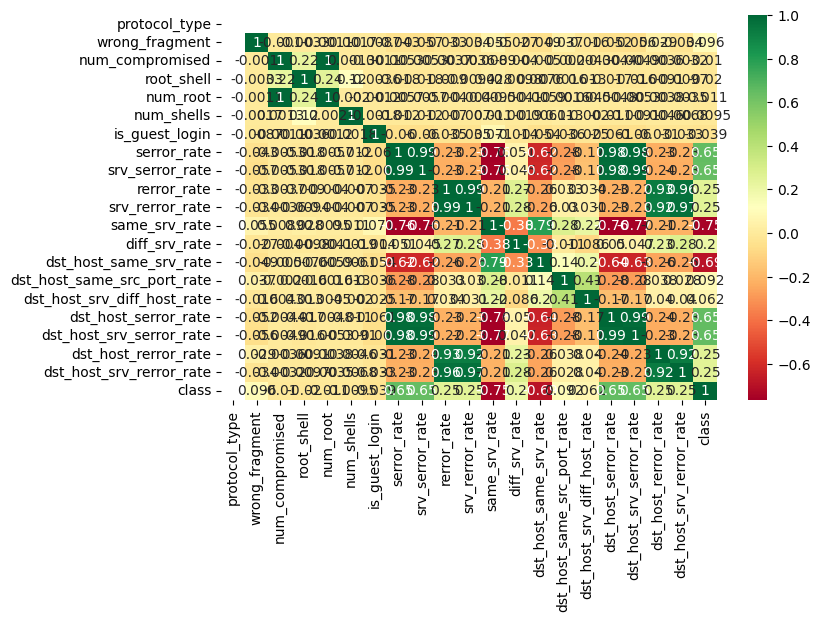

In [ ]:
plt.subplots(figsize=(8, 5))
sns.heatmap(X.corr(), annot=True, cmap="RdYlGn")
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = train[Selected_features]
y = train['class']


In [ ]:
# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


Train/Test split results:
LogisticRegression accuracy is 1.000
LogisticRegression log_loss is 0.000
LogisticRegression auc is 1.000


<ipython-input-24-d3236f0e252c>:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
<ipython-input-24-d3236f0e252c>:18: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')


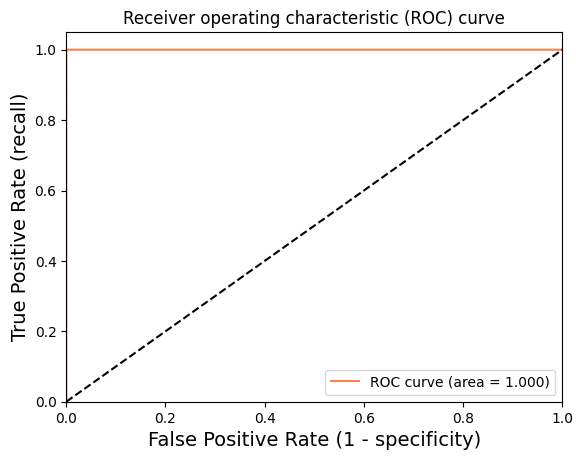

In [ ]:
# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95

plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
print("Using a threshold of %.3f " % thr[idx] + "guarantees a sensitivity of %.3f " % tpr[idx] +
      "and a specificity of %.3f" % (1-fpr[idx]) + ", i.e. a false positive rate of %.2f%%." % (np.array(fpr[idx])*100))


Using a threshold of 0.999 guarantees a sensitivity of 0.950 and a specificity of 1.000, i.e. a false positive rate of 0.00%.


In [ ]:
# 10-fold cross-validation logistic regression
logreg = LogisticRegression()
# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - althought they are many
scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-fold cross-validation results:')
print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

K-fold cross-validation results:
LogisticRegression average accuracy is 1.000
LogisticRegression average log_loss is 0.000
LogisticRegression average auc is 1.000


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import cross_validate

scoring = {'accuracy': 'accuracy', 'log_loss': 'neg_log_loss', 'auc': 'roc_auc'}

modelCV = LogisticRegression()

results = cross_validate(modelCV, X, y, cv=10, scoring=list(scoring.values()),
                         return_train_score=False)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [ ]:
print('K-fold cross-validation results:')
for sc in range(len(scoring)):
    print(modelCV.__class__.__name__+" average %s: %.3f (+/-%.3f)" % (list(scoring.keys())[sc], -results['test_%s' % list(scoring.values())[sc]].mean()
                               if list(scoring.values())[sc]=='neg_log_loss'
                               else results['test_%s' % list(scoring.values())[sc]].mean(),
                               results['test_%s' % list(scoring.values())[sc]].std()))

from sklearn.model_selection import GridSearchCV

X = train[Selected_features]


K-fold cross-validation results:
LogisticRegression average accuracy: 1.000 (+/-0.000)
LogisticRegression average log_loss: 0.000 (+/-0.000)
LogisticRegression average auc: 1.000 (+/-0.000)


In [ ]:
param_grid = {'C': np.arange(1e-05, 3, 0.1)}
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}

gs = GridSearchCV(LogisticRegression(), return_train_score=True,
                  param_grid=param_grid, scoring=scoring, cv=10, refit='Accuracy')


In [ ]:
gs.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000e-05, 1.00010e-01, 2.00010e-01, 3.00010e-01, 4.00010e-01,
       5.00010e-01, 6.00010e-01, 7.00010e-01, 8.00010e-01, 9.00010e-01,
       1.00001e+00, 1.10001e+00, 1.20001e+00, 1.30001e+00, 1.40001e+00,
       1.50001e+00, 1.60001e+00, 1.70001e+00, 1.80001e+00, 1.90001e+00,
       2.00001e+00, 2.10001e+00, 2.20001e+00, 2.30001e+00, 2.40001e+00,
       2.50001e+00, 2.60001e+00, 2.70001e+00, 2.80001e+00, 2.90001e+00])},
             refit='Accuracy', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Log_loss': 'neg_log_loss'})

In [ ]:
results = gs.cv_results_

In [ ]:
print('='*20)
print("best params: " + str(gs.best_estimator_))
print("best params: " + str(gs.best_params_))
print('best score:', gs.best_score_)
print('='*20)


best params: LogisticRegression(C=0.10001)
best params: {'C': 0.10001}
best score: 1.0


Text(0.5, 1.0, 'GridSearchCV evaluating using multiple scorers simultaneously')

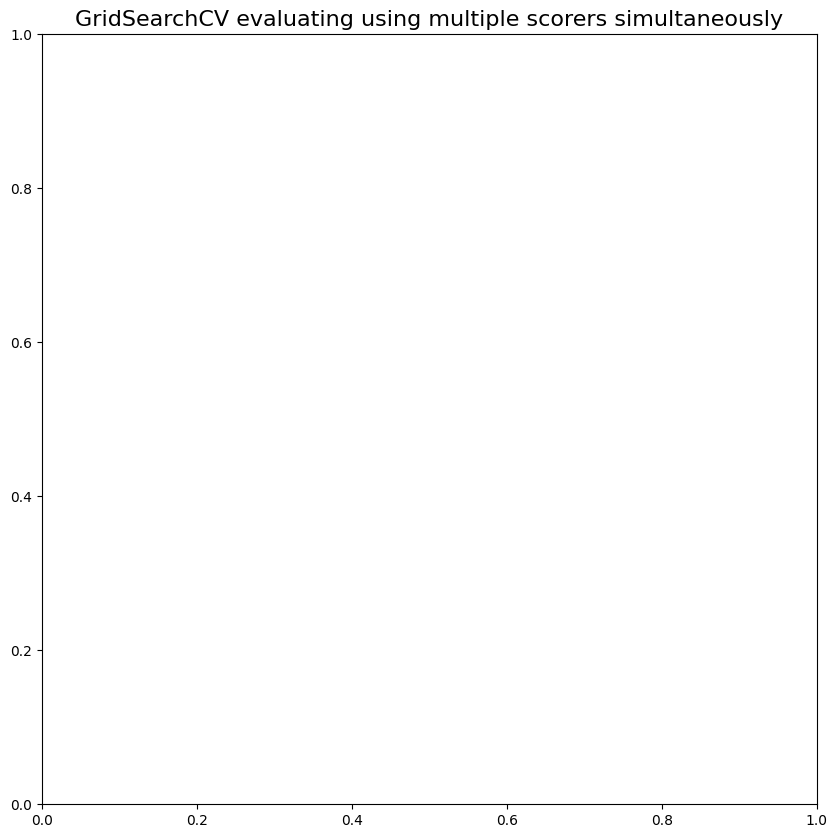

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)


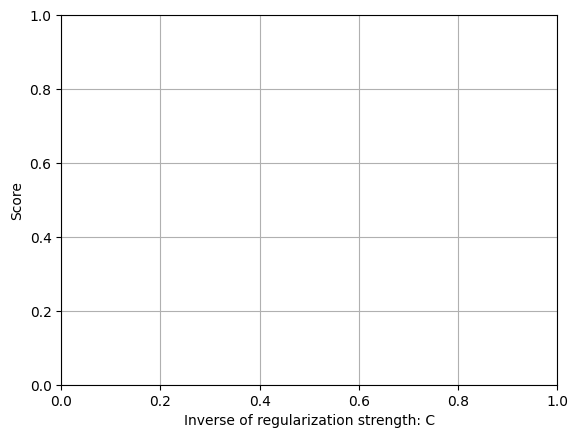

In [ ]:
plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()


(0.35, 0.95)

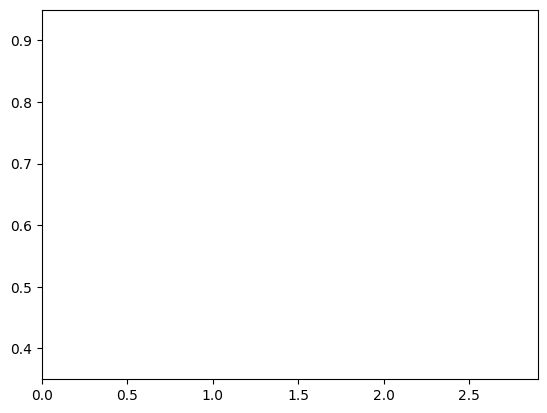

In [ ]:
ax = plt.axes()
ax.set_xlim(0, param_grid['C'].max())
ax.set_ylim(0.35, 0.95)


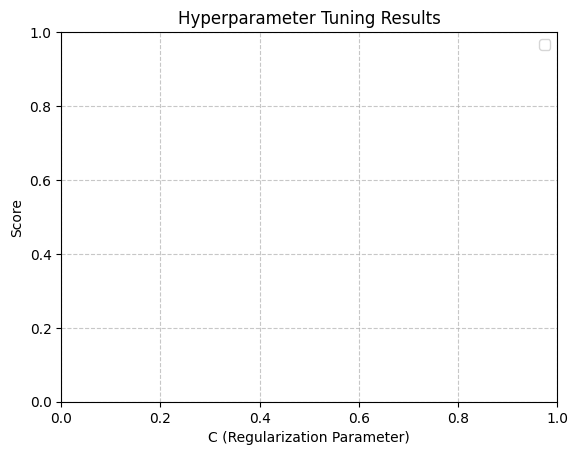

In [ ]:
# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_C'].data, dtype=float)

for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer] == 'neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        label = "%s (%s)" % (scorer, sample)
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label=label)

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer] == 'neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score], linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

# Add labels and title
plt.xlabel("C (Regularization Parameter)")
plt.ylabel("Score")
plt.title("Hyperparameter Tuning Results")

# Add legend and grid lines
plt.legend(loc="upper right")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline


In [ ]:
#Define simple model
###############################################################################
C = np.arange(1e-05, 5.5, 0.1)
scoring = {'Accuracy': 'accuracy', 'AUC': 'roc_auc', 'Log_loss': 'neg_log_loss'}
log_reg = LogisticRegression()

#Simple pre-processing estimators
###############################################################################
std_scale = StandardScaler(with_mean=False, with_std=False)
#std_scale = StandardScaler()


In [ ]:
#Defining the CV method: Using the Repeated Stratified K Fold
###############################################################################

n_folds=5
n_repeats=5

rskfold = RepeatedStratifiedKFold(n_splits=n_folds, n_repeats=n_repeats, random_state=2)

#Creating simple pipeline and defining the gridsearch
###############################################################################

log_clf_pipe = Pipeline(steps=[('scale',std_scale), ('clf',log_reg)])

log_clf = GridSearchCV(estimator=log_clf_pipe, cv=rskfold,
              scoring=scoring, return_train_score=True,
              param_grid=dict(clf__C=C), refit='Accuracy')

In [ ]:
log_clf.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=5, n_splits=5, random_state=2),
             estimator=Pipeline(steps=[('scale',
                                        StandardScaler(with_mean=False,
                                                       with_std=False)),
                                       ('clf', LogisticRegression())]),
             param_grid={'clf__C': array([1.00000e-05, 1.00010e-01, 2.00010e-01, 3.00010e-01, 4.00010e-01,
       5.00010e-01, 6.00010e-01, 7.00010e-01, 8.00010e-01, 9.00010e-01,
       1.00001e+...
       3.50001e+00, 3.60001e+00, 3.70001e+00, 3.80001e+00, 3.90001e+00,
       4.00001e+00, 4.10001e+00, 4.20001e+00, 4.30001e+00, 4.40001e+00,
       4.50001e+00, 4.60001e+00, 4.70001e+00, 4.80001e+00, 4.90001e+00,
       5.00001e+00, 5.10001e+00, 5.20001e+00, 5.30001e+00, 5.40001e+00])},
             refit='Accuracy', return_train_score=True,
             scoring={'AUC': 'roc_auc', 'Accuracy': 'accuracy',
                      'Log_loss': 'neg_log_loss'})

In [ ]:
results = log_clf.cv_results_

In [ ]:
print('='*20)
print("best params: " + str(log_clf.best_estimator_))
print("best params: " + str(log_clf.best_params_))
print('best score:', log_clf.best_score_)
print('='*20)


best params: Pipeline(steps=[('scale', StandardScaler(with_mean=False, with_std=False)),
                ('clf', LogisticRegression(C=0.10001))])
best params: {'clf__C': 0.10001}
best score: 1.0


(0.35, 0.95)

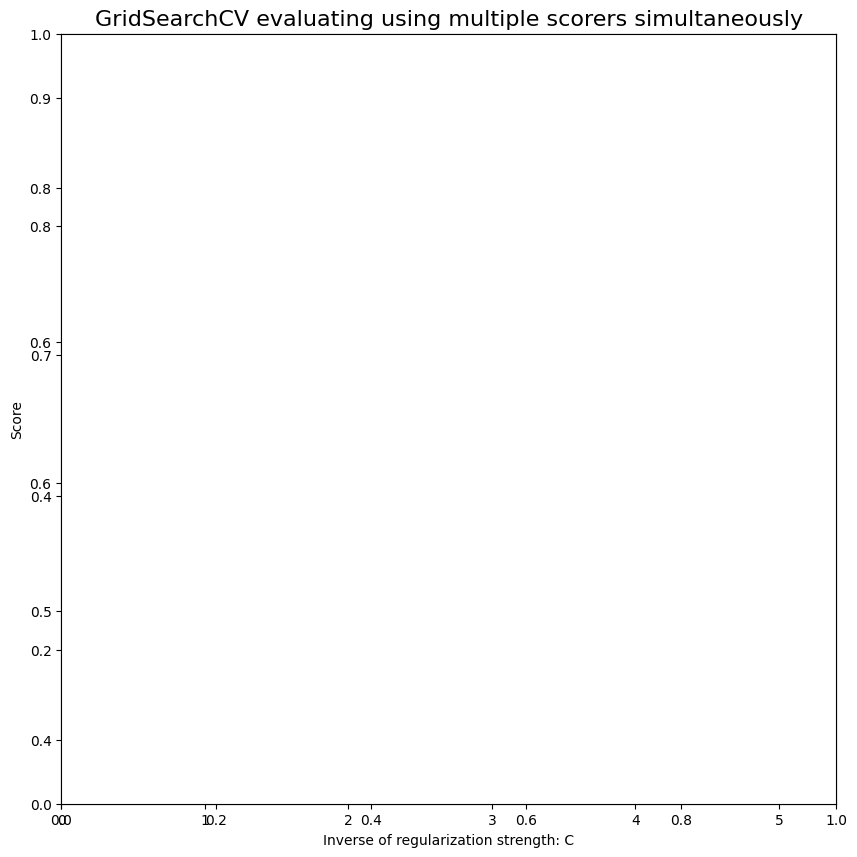

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("GridSearchCV evaluating using multiple scorers simultaneously",fontsize=16)

plt.xlabel("Inverse of regularization strength: C")
plt.ylabel("Score")
plt.grid()

ax = plt.axes()
ax.set_xlim(0, C.max())
ax.set_ylim(0.35, 0.95)


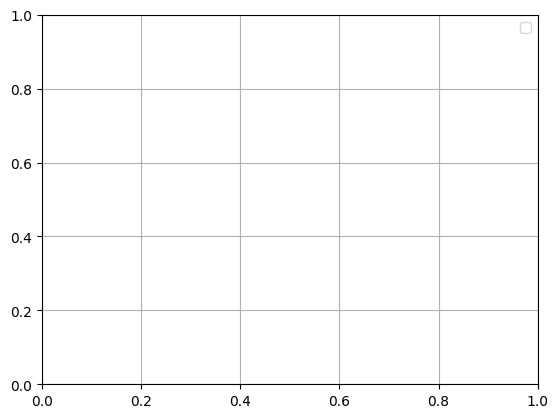

In [ ]:
# Get the regular numpy array from the MaskedArray
X_axis = np.array(results['param_clf__C'].data, dtype=float)
for scorer, color in zip(list(scoring.keys()), ['g', 'k', 'b']):
    for sample, style in (('train', '--'), ('test', '-')):
        sample_score_mean = -results['mean_%s_%s' % (sample, scorer)] if scoring[scorer]=='neg_log_loss' else results['mean_%s_%s' % (sample, scorer)]
        sample_score_std = results['std_%s_%s' % (sample, scorer)]
        ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                        sample_score_mean + sample_score_std,
                        alpha=0.1 if sample == 'test' else 0, color=color)
        ax.plot(X_axis, sample_score_mean, style, color=color,
                alpha=1 if sample == 'test' else 0.7,
                label="%s (%s)" % (scorer, sample))

    best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
    best_score = -results['mean_test_%s' % scorer][best_index] if scoring[scorer]=='neg_log_loss' else results['mean_test_%s' % scorer][best_index]

    # Plot a dotted vertical line at the best score for that scorer marked by x
    ax.plot([X_axis[best_index], ] * 2, [0, best_score],
            linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

    # Annotate the best score for that scorer
    ax.annotate("%0.2f" % best_score,
                (X_axis[best_index], best_score + 0.005))

plt.legend(loc="best")
plt.grid('off')
plt.show()


In [ ]:
#-------------------------------LR COMPLETED-------------------------------------------------------

In [ ]:
#=================================================================================================================================================

In [ ]:
import numpy as np
import pandas as pd
from pandas import Timestamp
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix ,accuracy_score ,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
import matplotlib.gridspec as gridspec


In [ ]:
train = pd.read_csv("/content/NSL_KDD_TRAIN.csv")

train.columns

train.isnull().sum()
train.drop(columns='level',axis=1, inplace=True )


In [ ]:
attack_n = []
for i in train['class'] :
  if i == 'normal':
    attack_n.append("normal")
  else:
    attack_n.append("attack")
train['class'] = attack_n
train['class'].value_counts()


normal    67343
attack    58630
Name: class, dtype: int64

In [ ]:
print(train.columns)



Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [ ]:
print(train.head())


   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [ ]:
print(train.dtypes)


duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

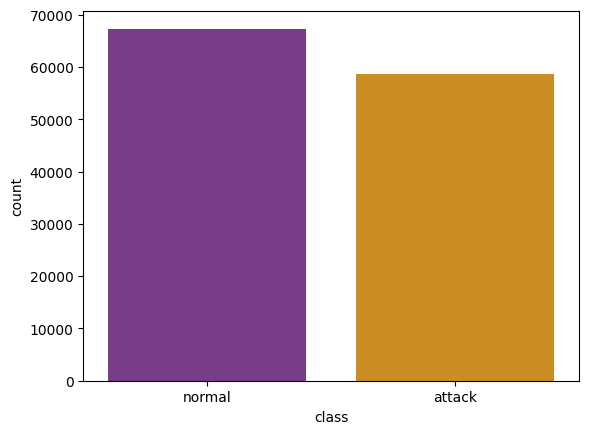

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=train, palette='CMRmap')
plt.show()


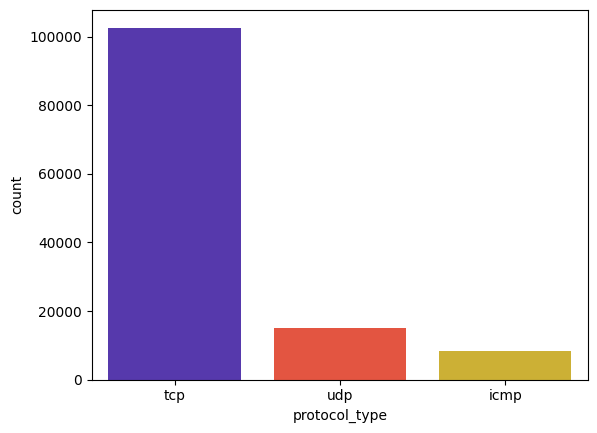

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='protocol_type', data=train, palette='CMRmap')
plt.show()


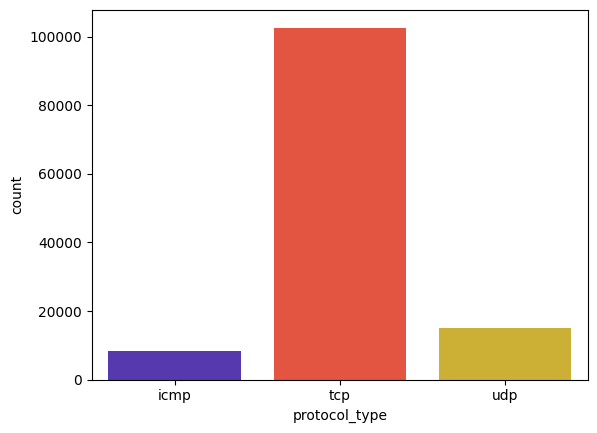

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'protocol_type' to categorical
train['protocol_type'] = train['protocol_type'].astype('category')

# Create countplot
sns.countplot(x='protocol_type', data=train, palette='CMRmap')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check column names
print(train.columns)




Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


In [ ]:
print(train.columns)

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'class'],
      dtype='object')


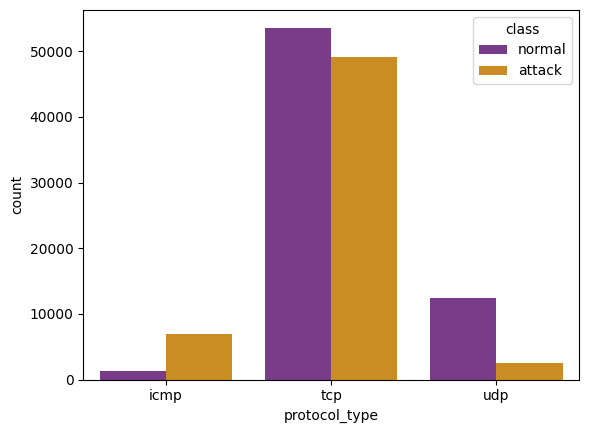

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create countplot using 'protocol_type' as the x-axis and 'class' as the hue
sns.countplot(x='protocol_type', hue='class', data=train, palette='CMRmap')
plt.show()


<Axes: xlabel='count', ylabel='service'>

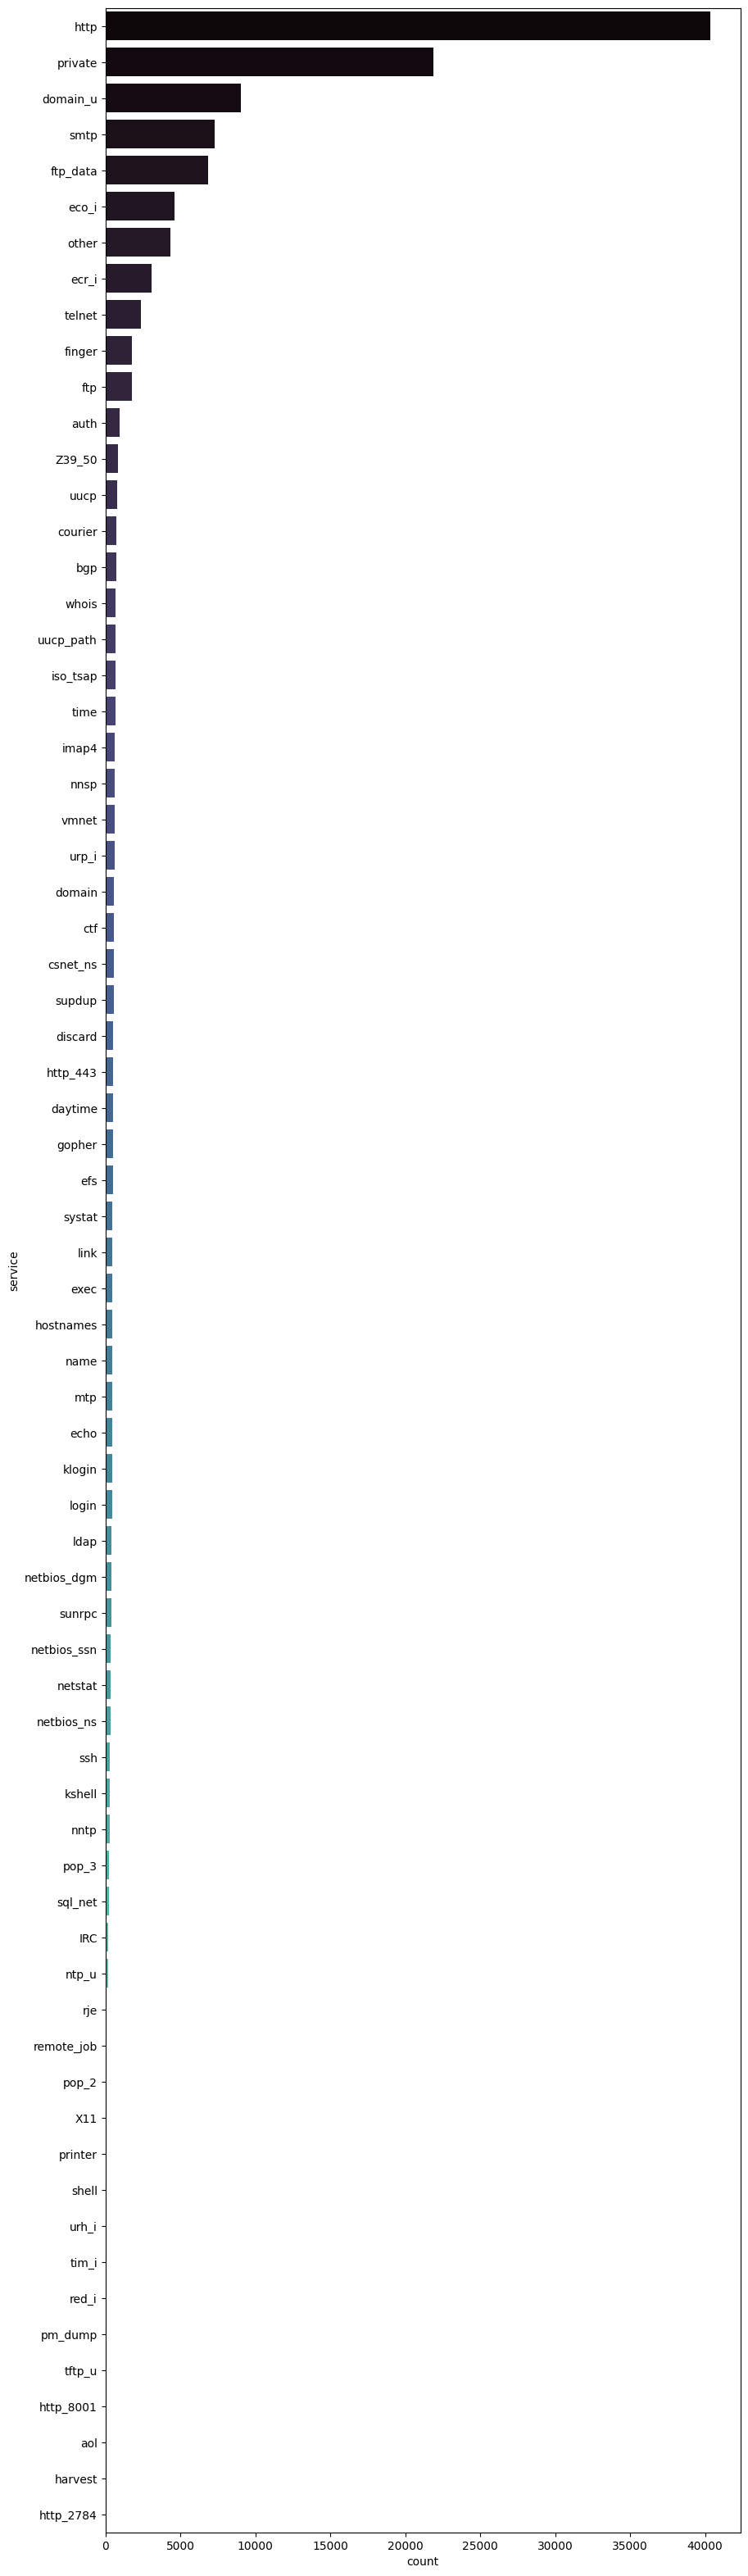

In [ ]:
plt.figure(figsize=(10,40))
sns.countplot(palette='mako', y='service' , data=train, order = train['service'].value_counts().index)


<Axes: xlabel='flag', ylabel='count'>

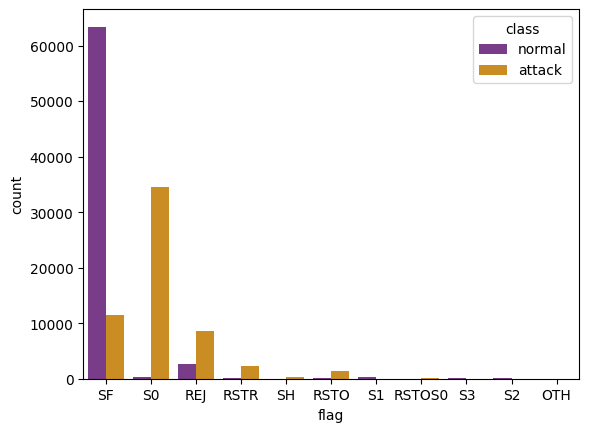

In [ ]:
sns.countplot(x='flag',hue='class' , data = train , palette ='CMRmap')

In [ ]:
data_obj = train.select_dtypes(['object']).columns
train["class"].value_counts()



normal    67343
attack    58630
Name: class, dtype: int64

In [ ]:
data_obj

Index(['service', 'flag', 'class'], dtype='object')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
protocol_type_le = LabelEncoder()
service_le = LabelEncoder()
flag_le = LabelEncoder()
train['protocol_type'] = protocol_type_le.fit_transform(train['protocol_type'])
train['service'] = service_le.fit_transform(train['service'])
train['flag'] = flag_le.fit_transform(train['flag'])


In [ ]:
attack_n = []
for i in train['class']:
    if i == 'normal':
        attack_n.append(0)
    else:
        attack_n.append(1)

train['class'] = attack_n
train['class'].value_counts()



0    67343
1    58630
Name: class, dtype: int64

<Axes: >

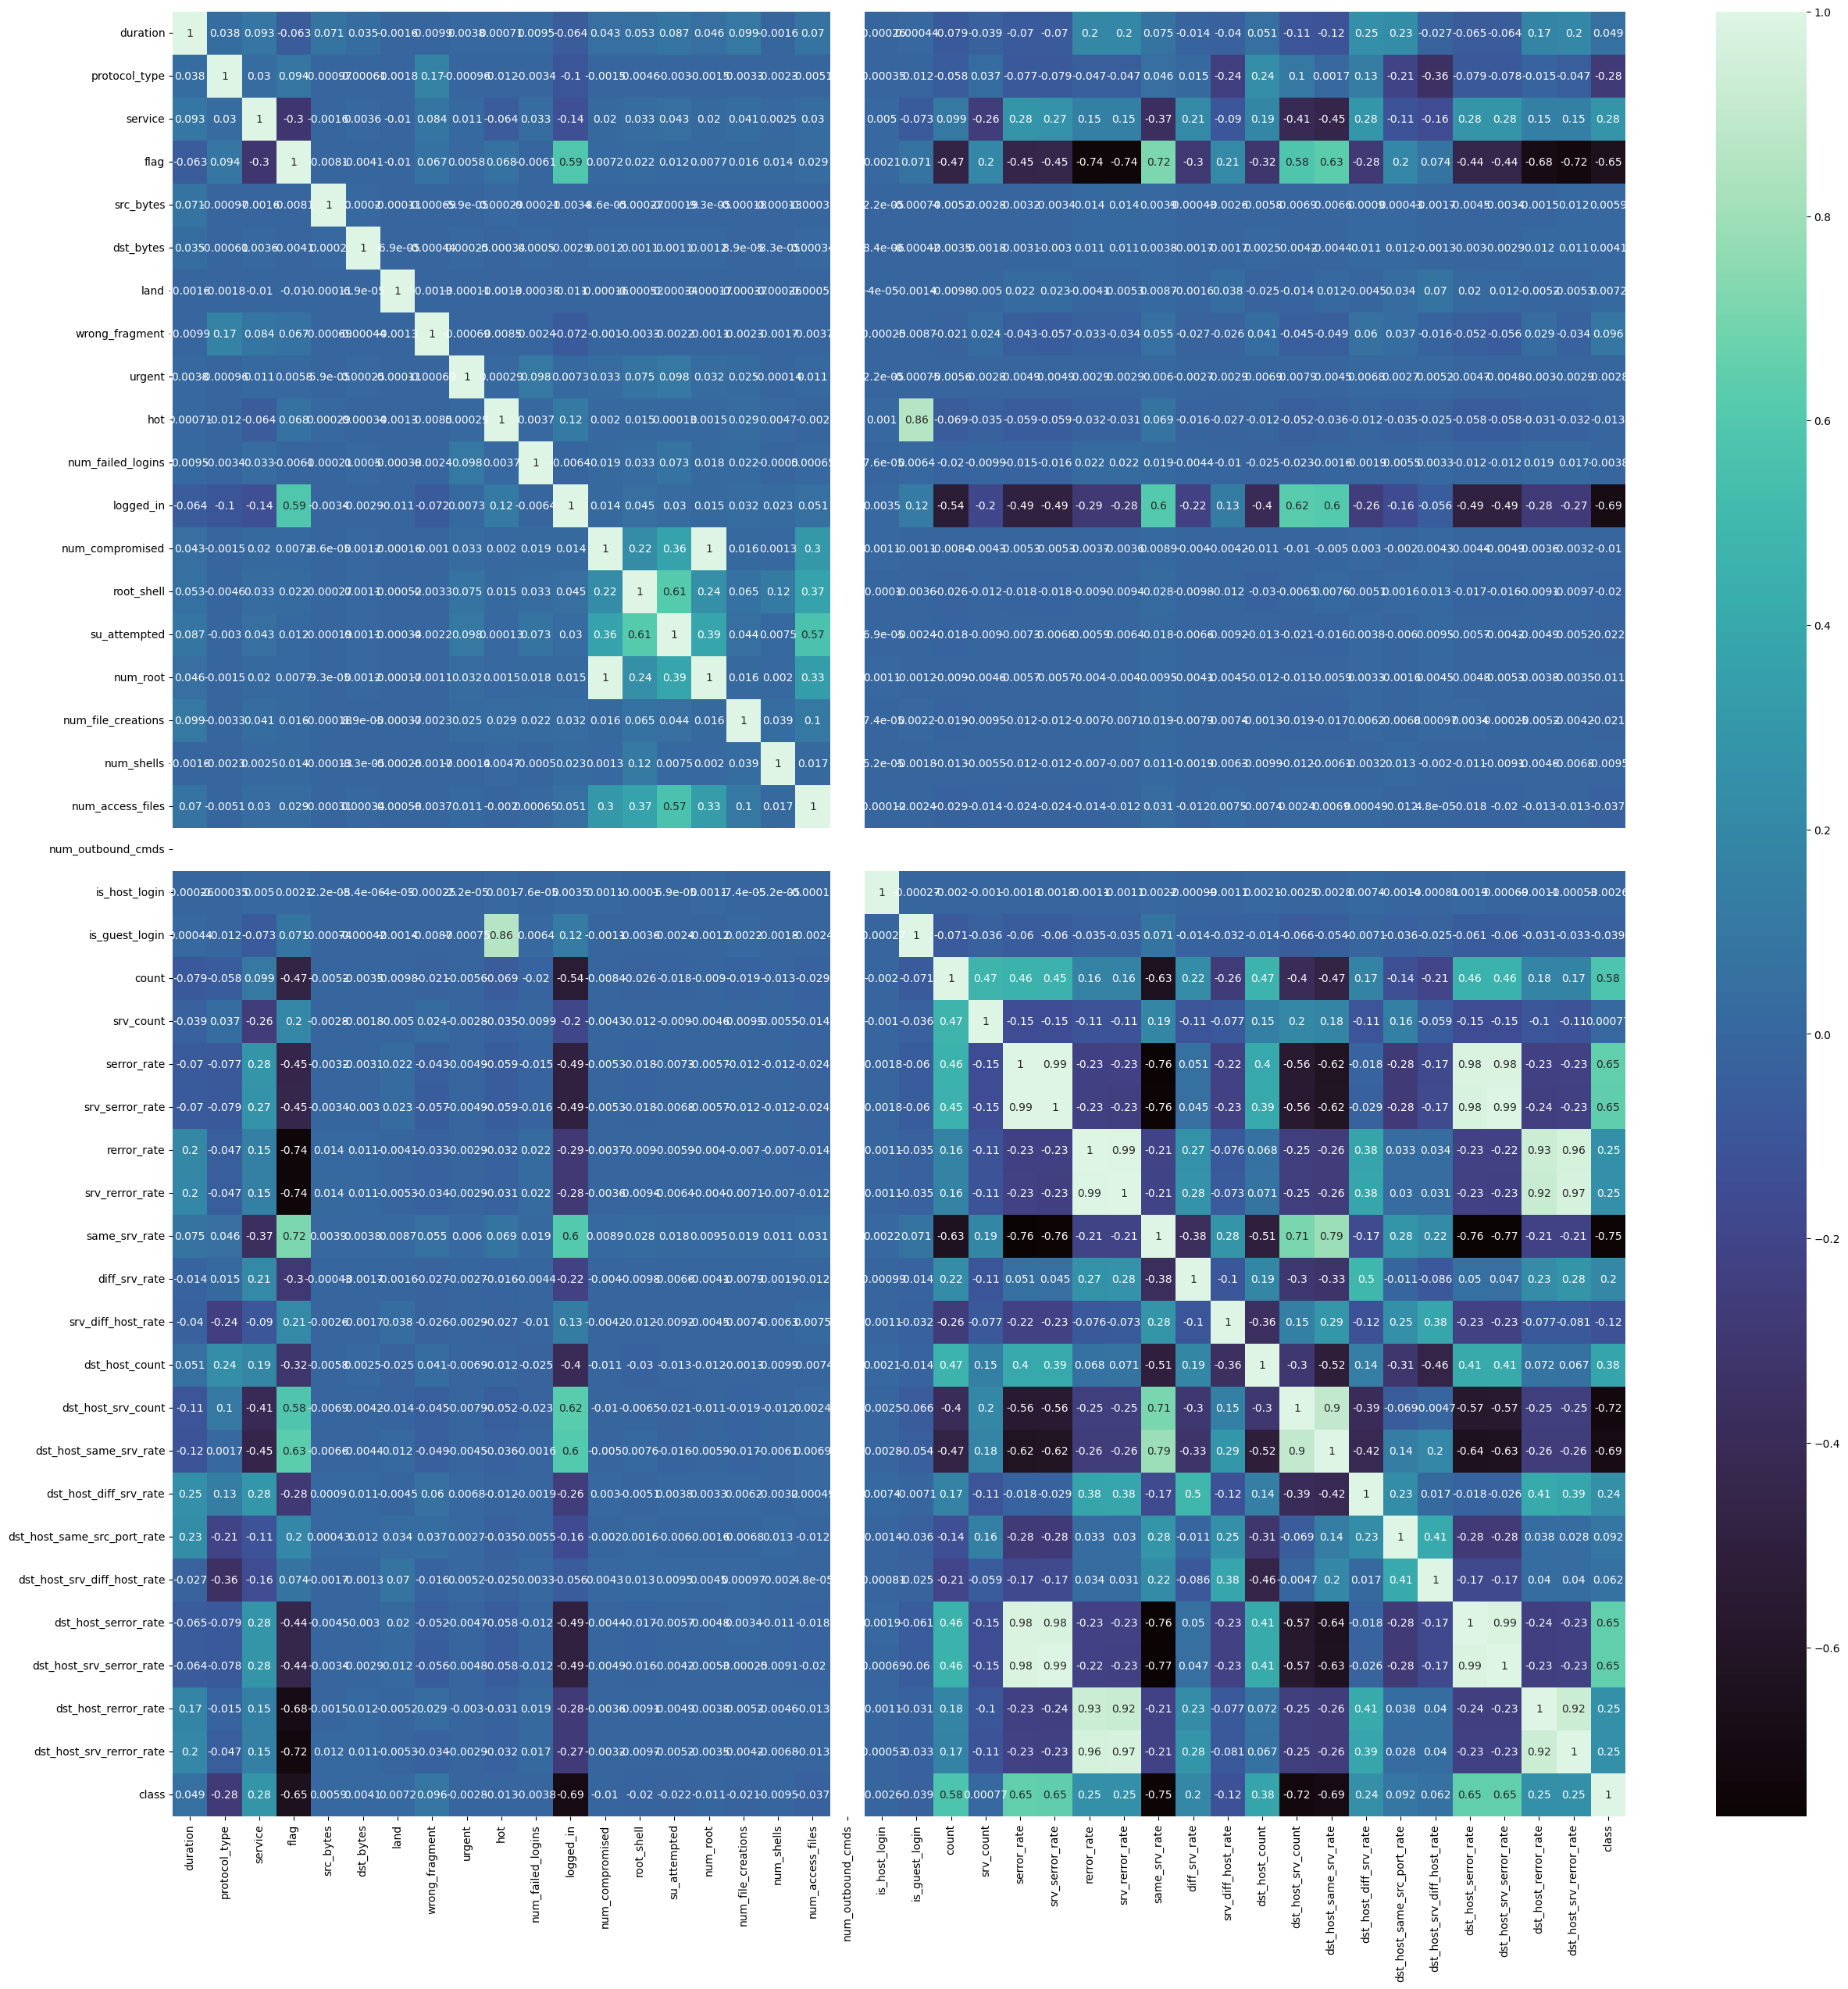

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(train.corr(), annot= True,cmap='mako')


In [ ]:
y = train['class'].copy()
x = train.drop(['class'], axis=1)



In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=40)

In [ ]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test = scalar.fit_transform(x_test)


In [ ]:
lin_svc = svm.LinearSVC().fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
Y_pred =lin_svc.predict(x_test)

In [ ]:
print('The Training accuracy = ',lin_svc.score(x_train, y_train))
print('The Testing accuracy = ',lin_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "linearSVC  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred),3)))

print(classification_report(y_test,Y_pred))


The Training accuracy =  0.9545140109547409
The Testing accuracy =  0.9566574936494496
------------------------------------------------
linearSVC  accuracy  : 0.957
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     20067
           1       0.97      0.94      0.95     17725

    accuracy                           0.96     37792
   macro avg       0.96      0.96      0.96     37792
weighted avg       0.96      0.96      0.96     37792



In [ ]:
rbf_svc = svm.SVC(kernel='rbf').fit(x_train, y_train)
Y_pred_rbf =rbf_svc.predict(x_test)


In [ ]:
print('The Training accuracy = ',rbf_svc.score(x_train, y_train))
print('The Testing accuracy = ',rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))
print(classification_report(y_test,Y_pred_rbf))


The Training accuracy =  0.9922092060647986
The Testing accuracy =  0.9912944538526672
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.991
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [ ]:
svclassifier_poly = SVC(kernel='poly')a
poly = svclassifier_poly.fit(x_train,y_train)
Y_pred_poly =svclassifier_poly.predict(x_test)


In [ ]:
print('The Training accuracy = ',poly.score(x_train, y_train))
print('The Testing accuracy = ',poly.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'poly')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_poly),3)))
print(classification_report(y_test,Y_pred_poly))
print(classification_report(y_test,Y_pred_poly))


The Training accuracy =  0.9916875517401708
The Testing accuracy =  0.9897861981371718
------------------------------------------------
SVM (kernel: 'poly')  accuracy  : 0.99
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [ ]:
param_grid = {'C': [0.2,0.5,1], 'gamma': [0.5],'kernel': ['rbf']}
grid = GridSearchCV(SVC(),param_grid ,verbose=2, cv= 3,refit=False)


In [ ]:
grid.fit(x_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.0min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time= 1.2min
[CV] END .......................C=0.2, gamma=0.5, kernel=rbf; total time=  55.0s
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .......................C=0.5, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.4min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.1min
[CV] END .........................C=1, gamma=0.5, kernel=rbf; total time= 1.2min


GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.2, 0.5, 1], 'gamma': [0.5], 'kernel': ['rbf']},
             refit=False, verbose=2)

In [ ]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}


In [ ]:
rbf_svc = svm.SVC(kernel=grid.best_params_['kernel'], gamma=grid.best_params_['gamma'], C=grid.best_params_['C']).fit(x_train, y_train)

In [ ]:
Y_pred_rbf =rbf_svc.predict(x_test)

In [ ]:
print(rbf_svc.score(x_train, y_train))
print(rbf_svc.score(x_test, y_test))
print("------------------------------------------------")
print( "SVM (kernel: 'rbf')  accuracy  : " + str(np.round(accuracy_score(y_test,Y_pred_rbf),3)))

print(classification_report(y_test,Y_pred_rbf))


0.9976752361619851
0.9935436071126165
------------------------------------------------
SVM (kernel: 'rbf')  accuracy  : 0.994
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20067
           1       0.99      0.99      0.99     17725

    accuracy                           0.99     37792
   macro avg       0.99      0.99      0.99     37792
weighted avg       0.99      0.99      0.99     37792



In [ ]:
def plot_cm(y_true, y_pred, title):
    figsize=(10,10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np

plot_cm(y_test,Y_pred_rbf, 'Confusion matrix for predictions on the testing using SVC(kernel : \'rbf\')')


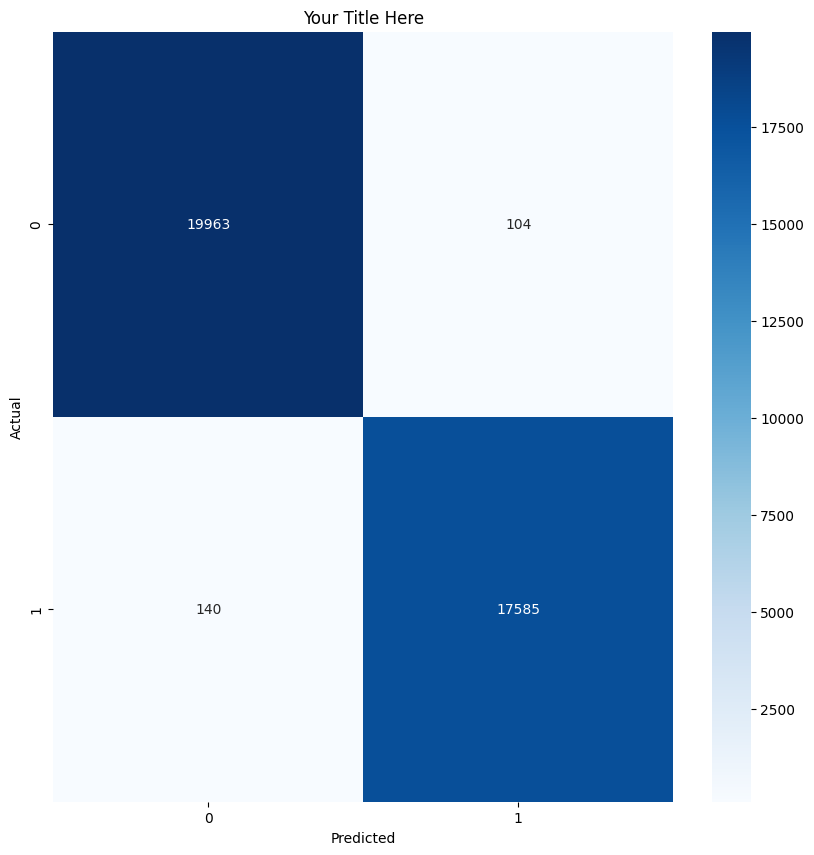

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cm(y_true, y_pred, title):
    figsize = (10, 10)
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))

    plt.figure(figsize=figsize)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Assuming you have y_test and Y_pred_rbf defined
# Replace 'Your Title Here' with an appropriate title
plot_cm(y_test, Y_pred_rbf, 'Your Title Here')


In [ ]:
#-------------------------------SVM COMPLETED ----------------------------------------------

In [ ]:
#==============================================================================================================================================

In [ ]:
print('Training set:')
for col_name in train.columns:
    if train[col_name].dtypes == 'object':
        unique_cat = len(train[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

print()
print('Distribution of categories in service:')
print(train['service'].value_counts().sort_values(ascending=False).head())

Training set:

Distribution of categories in service:
24    40338
49    21853
12     9043
54     7313
20     6860
Name: service, dtype: int64


In [ ]:
print('Test set:')
for col_name in test.columns:
    if test[col_name].dtypes == 'object':
        unique_cat = len(test[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))

Test set:
Feature 'protocol_type' has 3 categories
Feature 'service' has 64 categories
Feature 'flag' has 11 categories
Feature 'class' has 38 categories


In [ ]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
categorical_columns=['protocol_type', 'service', 'flag']

In [ ]:
df_categorical_values = train[categorical_columns]
testdf_categorical_values = test[categorical_columns]

df_categorical_values.head()



,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9


In [ ]:
import pandas as pd

# Creating a sample DataFrame
data = {'protocol_type': ['tcp', 'udp', 'icmp', 'tcp', 'udp']}
df = pd.DataFrame(data)

unique_protocol = sorted(df['protocol_type'].unique())
string1 = 'Protocol_type_'
unique_protocol2 = [string1 + x for x in unique_protocol]
print(unique_protocol2)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp']


In [ ]:
# service
import pandas as pd

# Creating a sample DataFrame
data = {'service': ['http', 'ftp', 'ssh', 'http', 'smtp']}
df = pd.DataFrame(data)

# Extracting unique service values and adding a prefix
unique_service = sorted(df['service'].unique())
string2 = 'service_'
unique_service2 = [string2 + x for x in unique_service]
print(unique_service2)


['service_ftp', 'service_http', 'service_smtp', 'service_ssh']


In [ ]:
# flag
import pandas as pd

# Creating a sample DataFrame
data = {'flag': ['SF', 'RSTO', 'S0', 'SF', 'REJ']}
df = pd.DataFrame(data)

# Extracting unique flag values and adding a prefix
unique_flag = sorted(df['flag'].unique())
string3 = 'flag_'
unique_flag2 = [string3 + x for x in unique_flag]
print(unique_flag2)


['flag_REJ', 'flag_RSTO', 'flag_S0', 'flag_SF']


In [ ]:
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2


In [ ]:
#do it for test set
import pandas as pd

# Creating a sample test DataFrame
data_test = {'service': ['http', 'ftp', 'ssh', 'http', 'smtp']}
df_test = pd.DataFrame(data_test)

unique_service_test = sorted(df_test['service'].unique())
unique_service2_test = [string2 + x for x in unique_service_test]
testdumcols = unique_protocol2 + unique_service2_test + unique_flag2


In [ ]:
df_categorical_values_enc=df_categorical_values.apply(LabelEncoder().fit_transform)

In [ ]:
print(df_categorical_values.head())
print('--------------------')
print(df_categorical_values_enc.head())


   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9
--------------------
   protocol_type  service  flag
0              1       20     9
1              2       44     9
2              1       49     5
3              1       24     9
4              1       24     9


In [ ]:
# test set
testdf_categorical_values_enc=testdf_categorical_values.apply(LabelEncoder().fit_transform)


In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)



In [ ]:
enc = OneHotEncoder(categories='auto')
df_categorical_values_encenc = enc.fit_transform(df_categorical_values_enc)

# Print the number of columns in the OneHotEncoded data and the first few elements of dumcols
print("Number of columns in OneHotEncoded data:", df_categorical_values_encenc.shape[1])
print("Length of dumcols:", len(dumcols))




Number of columns in OneHotEncoded data: 84
Length of dumcols: 11


In [ ]:
print("Number of columns in dumcols:", len(dumcols))
print("Number of columns in df_categorical_values_encenc.toarray():", df_categorical_values_encenc.toarray().shape[1])


Number of columns in dumcols: 11
Number of columns in df_categorical_values_encenc.toarray(): 84


In [ ]:
print("Number of columns in dumcols:", len(dumcols))


Number of columns in dumcols: 11


In [ ]:
print("Number of columns in df_categorical_values_encenc.toarray():", df_categorical_values_encenc.shape[1])


Number of columns in df_categorical_values_encenc.toarray(): 84


In [ ]:
unique_categories_count = sum(df[col].nunique() for col in df.select_dtypes(include=['object']).columns)
print("Number of unique categories:", unique_categories_count)
# Update dumcols to have 84 elements
dumcols = [f'col_{i}' for i in range(84)]

# Now, you can use dumcols to create the DataFrame
df_cat_data = pd.DataFrame(df_categorical_values_encenc.toarray(), columns=dumcols)


Number of unique categories: 4


In [ ]:
# test set
# Update testdumcols to have the correct number of elements
testdumcols = [f'col_{i}' for i in range(testdf_categorical_values_encenc.shape[1])]

# Now, you can use testdumcols to create the DataFrame for the test set
testdf_cat_data = pd.DataFrame(testdf_categorical_values_encenc.toarray(), columns=testdumcols)



In [ ]:
df_cat_data.head()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_74,col_75,col_76,col_77,col_78,col_79,col_80,col_81,col_82,col_83
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
print("Columns in the training set:")
print(df.columns)

print("\nColumns in the test set:")
print(df_test.columns)



Columns in the training set:
Index(['flag'], dtype='object')

Columns in the test set:
Index(['service'], dtype='object')


In [ ]:
#Add a Dummy 'service' Column to the Training Set:

#You can add a dummy 'service' column to the training set with appropriate default values (zeros or any other reasonable default). This ensures that the column exists in both DataFrames.
df['service'] = 0  # Add a dummy 'service' column with default value


In [ ]:
#Remove the 'service' Column from the Test Set:
df_test = df_test.drop('service', axis=1)


In [ ]:
trainservice=df['service'].tolist()



In [ ]:
df_test['service'] = 0  # Add a dummy 'service' column with default value


In [ ]:
common_columns = set(df.columns) & set(df_test.columns)
df_test = df_test[common_columns]  # Keep only columns present in both DataFrames


<ipython-input-154-9b32b6aab949>:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df_test = df_test[common_columns]  # Keep only columns present in both DataFrames


In [ ]:
testservice= df_test['service'].tolist()

In [ ]:
difference=list(set(trainservice) - set(testservice))
string = 'service_'
difference=[string + x for x in difference]
difference


[]

In [ ]:
for col in difference:
    testdf_cat_data[col] = 0

print(df_cat_data.shape)
print(testdf_cat_data.shape)


(125973, 84)
(22544, 78)


In [ ]:
newdf=df.join(df_cat_data)
newdf.drop('flag', axis=1, inplace=True)



In [ ]:
print(df.columns)


Index(['flag', 'service'], dtype='object')


In [ ]:
print(df.columns)


Index(['flag', 'service'], dtype='object')


In [ ]:
print(newdf.columns)


Index(['service', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12',
       'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19',
       'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26',
       'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33',
       'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40',
       'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47',
       'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54',
       'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61',
       'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68',
       'col_69', 'col_70', 'col_71', 'col_72', 'col_73', 'col_74', 'col_75',
       'col_76', 'col_77', 'col_78', 'col_79', 'col_80', 'col_81', 'col_82',
       'col_83'],
      dtype='object')


In [ ]:
print(newdf.head())


   service  col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  col_8  \
0        0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1        0    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2        0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3        0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4        0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

   ...  col_74  col_75  col_76  col_77  col_78  col_79  col_80  col_81  \
0  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2  ...     0.0     0.0     0.0     0.0     1.0     0.0     0.0     0.0   
3  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4  ...     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

   col_82  col_83  
0     1.0     0.0  
1     1.0     0.0  
2     0.0     0.0  
3     1.0   

In [ ]:
print(newdf.columns)


Index(['service', 'col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5',
       'col_6', 'col_7', 'col_8', 'col_9', 'col_10', 'col_11', 'col_12',
       'col_13', 'col_14', 'col_15', 'col_16', 'col_17', 'col_18', 'col_19',
       'col_20', 'col_21', 'col_22', 'col_23', 'col_24', 'col_25', 'col_26',
       'col_27', 'col_28', 'col_29', 'col_30', 'col_31', 'col_32', 'col_33',
       'col_34', 'col_35', 'col_36', 'col_37', 'col_38', 'col_39', 'col_40',
       'col_41', 'col_42', 'col_43', 'col_44', 'col_45', 'col_46', 'col_47',
       'col_48', 'col_49', 'col_50', 'col_51', 'col_52', 'col_53', 'col_54',
       'col_55', 'col_56', 'col_57', 'col_58', 'col_59', 'col_60', 'col_61',
       'col_62', 'col_63', 'col_64', 'col_65', 'col_66', 'col_67', 'col_68',
       'col_69', 'col_70', 'col_71', 'col_72', 'col_73', 'col_74', 'col_75',
       'col_76', 'col_77', 'col_78', 'col_79', 'col_80', 'col_81', 'col_82',
       'col_83'],
      dtype='object')


In [ ]:
print(df.columns)

Index([], dtype='object')


In [ ]:
# Remove keys 'flag' and 'service' from the dictionary
data.pop('flag', None)
data.pop('service', None)

# Convert the modified dictionary to a DataFrame
newdf = pd.DataFrame.from_dict(data)

# Join with df_cat_data if needed
newdf = newdf.join(df_cat_data)


In [ ]:
# Assuming df_test and testdf_cat_data are your original DataFrames

# Find the prefix of the columns (assuming it is 'col_')
column_prefix = 'col_'

# Find the range of column numbers
start_column = 0
end_column = len(df_test.columns) - 2  # Assuming the last two columns are 'service' and 'protocol_type'

# Generate the list of selected columns
selected_columns = ['service'] + [f'{column_prefix}{i}' for i in range(start_column, end_column + 1)] + ['protocol_type']




In [ ]:
# Assuming df_test and testdf_cat_data are your original DataFrames

# Find the prefix of the columns (assuming it is 'col_')
column_prefix = 'col_'

# Find the range of column numbers
start_column = 0
end_column = len(df_test.columns) - 2  # Assuming the last two columns are 'service' and 'protocol_type'

# Generate the list of selected columns
selected_columns = ['service'] + [f'{column_prefix}{i}' for i in range(start_column, end_column + 1)]

# Check if 'protocol_type' is present in df_test.columns
if 'protocol_type' in df_test.columns:
    selected_columns.append('protocol_type')

# Select the columns in df_test
df_test_selected = df_test[selected_columns]

# Drop unwanted columns
if 'service' in df_test_selected.columns and 'protocol_type' in df_test_selected.columns:
    newdf_test = df_test_selected.drop(['service', 'protocol_type'], axis=1, inplace=False)
else:
    print("Columns 'service' and/or 'protocol_type' not found in df_test_selected.")


Columns 'service' and/or 'protocol_type' not found in df_test_selected.


In [ ]:
# test data
newdf_test=df_test.join(testdf_cat_data)


In [ ]:
# Check if 'flag' is present in newdf_test.columns
if 'flag' in newdf_test.columns:
    newdf_test.drop('flag', axis=1, inplace=True)
else:
    print("Column 'flag' not found in newdf_test.")

Column 'flag' not found in newdf_test.


In [ ]:
# Check if 'protocol_type' is present in newdf_test.columns
if 'protocol_type' in newdf_test.columns:
    newdf_test.drop('protocol_type', axis=1, inplace=True)
else:
    print("Column 'protocol_type' not found in newdf_test.")


Column 'protocol_type' not found in newdf_test.


In [ ]:
newdf_test.drop('service', axis=1, inplace=True)


In [ ]:
print(newdf.shape)
print(newdf_test.shape)


(0, 84)
(5, 78)


In [ ]:
# Print the column names in newdf
print(newdf.columns)

# Check if 'label' is in the columns
if 'label' in newdf.columns:
    labeldf = newdf['label']
else:
    print("Column 'label' not found in newdf.")


Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70',
       'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77',
       'col_78', 'col_79', 'col_80', 'col_81', 'col_82', 'col_83'],
      dtype='object')
Column 'label' not found in newdf.


In [ ]:
# Print the column names in newdf_test
print(newdf_test.columns)

# Check if 'label' is in the columns
if 'label' in newdf_test.columns:
    labeldf_test = newdf_test['label']
else:
    print("Column 'label' not found in newdf_test.")


Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70',
       'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77'],
      dtype='object')
Column 'label' not found in newdf_test.


In [ ]:
labeldf = newdf['col_0']

In [ ]:
print(newdf.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70',
       'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77',
       'col_78', 'col_79', 'col_80', 'col_81', 'col_82', 'col_83'],
      dtype='object')


In [ ]:
print(newdf_test.columns)

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70',
       'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77'],
      dtype='object')


In [ ]:
print(newdf_test.columns)


Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_13', 'col_14',
       'col_15', 'col_16', 'col_17', 'col_18', 'col_19', 'col_20', 'col_21',
       'col_22', 'col_23', 'col_24', 'col_25', 'col_26', 'col_27', 'col_28',
       'col_29', 'col_30', 'col_31', 'col_32', 'col_33', 'col_34', 'col_35',
       'col_36', 'col_37', 'col_38', 'col_39', 'col_40', 'col_41', 'col_42',
       'col_43', 'col_44', 'col_45', 'col_46', 'col_47', 'col_48', 'col_49',
       'col_50', 'col_51', 'col_52', 'col_53', 'col_54', 'col_55', 'col_56',
       'col_57', 'col_58', 'col_59', 'col_60', 'col_61', 'col_62', 'col_63',
       'col_64', 'col_65', 'col_66', 'col_67', 'col_68', 'col_69', 'col_70',
       'col_71', 'col_72', 'col_73', 'col_74', 'col_75', 'col_76', 'col_77'],
      dtype='object')


In [ ]:
for column in newdf_test.columns:
    unique_values = newdf_test[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")


Column: col_0, Unique Values: [0. 1.]
Column: col_1, Unique Values: [1. 0.]
Column: col_2, Unique Values: [0.]
Column: col_3, Unique Values: [0.]
Column: col_4, Unique Values: [0.]
Column: col_5, Unique Values: [0.]
Column: col_6, Unique Values: [0.]
Column: col_7, Unique Values: [0.]
Column: col_8, Unique Values: [0.]
Column: col_9, Unique Values: [0.]
Column: col_10, Unique Values: [0.]
Column: col_11, Unique Values: [0.]
Column: col_12, Unique Values: [0.]
Column: col_13, Unique Values: [0.]
Column: col_14, Unique Values: [0.]
Column: col_15, Unique Values: [0.]
Column: col_16, Unique Values: [0. 1.]
Column: col_17, Unique Values: [0.]
Column: col_18, Unique Values: [0.]
Column: col_19, Unique Values: [0.]
Column: col_20, Unique Values: [0.]
Column: col_21, Unique Values: [0.]
Column: col_22, Unique Values: [0. 1.]
Column: col_23, Unique Values: [0.]
Column: col_24, Unique Values: [0.]
Column: col_25, Unique Values: [0.]
Column: col_26, Unique Values: [0.]
Column: col_27, Unique Val

In [ ]:
for column in newdf_test.columns:
    unique_values = newdf_test[column].unique()
    print(f"Column: {column}, Unique Values: {unique_values}")


Column: col_0, Unique Values: [0. 1.]
Column: col_1, Unique Values: [1. 0.]
Column: col_2, Unique Values: [0.]
Column: col_3, Unique Values: [0.]
Column: col_4, Unique Values: [0.]
Column: col_5, Unique Values: [0.]
Column: col_6, Unique Values: [0.]
Column: col_7, Unique Values: [0.]
Column: col_8, Unique Values: [0.]
Column: col_9, Unique Values: [0.]
Column: col_10, Unique Values: [0.]
Column: col_11, Unique Values: [0.]
Column: col_12, Unique Values: [0.]
Column: col_13, Unique Values: [0.]
Column: col_14, Unique Values: [0.]
Column: col_15, Unique Values: [0.]
Column: col_16, Unique Values: [0. 1.]
Column: col_17, Unique Values: [0.]
Column: col_18, Unique Values: [0.]
Column: col_19, Unique Values: [0.]
Column: col_20, Unique Values: [0.]
Column: col_21, Unique Values: [0.]
Column: col_22, Unique Values: [0. 1.]
Column: col_23, Unique Values: [0.]
Column: col_24, Unique Values: [0.]
Column: col_25, Unique Values: [0.]
Column: col_26, Unique Values: [0.]
Column: col_27, Unique Val

In [ ]:
labeldf_test = newdf_test['col_77']


In [ ]:
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


In [ ]:
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})


In [ ]:
# put the new label column back
newdf['label'] = newlabeldf


In [ ]:

newdf_test['label'] = newlabeldf_test


In [ ]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]


In [ ]:
# Kendisi dışındaki label değerine sahip tüm satırları filtrele
# isin filter function

DoS_df=newdf[newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['label'].isin(to_drop_U2R)];


In [ ]:
#test
DoS_df_test=newdf_test[newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['label'].isin(to_drop_U2R)];


In [ ]:
print('Train:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)


Train:
Dimensions of DoS: (0, 85)
Dimensions of Probe: (0, 85)
Dimensions of R2L: (0, 85)
Dimensions of U2R: (0, 85)

Test:
Dimensions of DoS: (5, 79)
Dimensions of Probe: (5, 79)
Dimensions of R2L: (5, 79)
Dimensions of U2R: (5, 79)


In [ ]:
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label


<ipython-input-236-cb679cfb0280>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS = DoS_df.drop('label',1)


In [ ]:
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label


<ipython-input-237-80c2bd4675e1>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe = Probe_df.drop('label',1)


In [ ]:
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label


<ipython-input-238-2fd090b8121c>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L = R2L_df.drop('label',1)


In [ ]:
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label


<ipython-input-239-808acb1af191>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R = U2R_df.drop('label',1)


In [ ]:
# test set
X_DoS_test = DoS_df_test.drop('label',1)
Y_DoS_test = DoS_df_test.label


<ipython-input-240-b7e186320341>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_DoS_test = DoS_df_test.drop('label',1)


In [ ]:
X_Probe_test = Probe_df_test.drop('label',1)
Y_Probe_test = Probe_df_test.label


<ipython-input-241-a16e62b9b7d0>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_Probe_test = Probe_df_test.drop('label',1)


In [ ]:
X_R2L_test = R2L_df_test.drop('label',1)
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop('label',1)
Y_U2R_test = U2R_df_test.label


<ipython-input-242-a5bbf5751ed7>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_R2L_test = R2L_df_test.drop('label',1)
<ipython-input-242-a5bbf5751ed7>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_U2R_test = U2R_df_test.drop('label',1)


In [ ]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)


In [ ]:
from sklearn import preprocessing

In [ ]:
# Check the number of samples in X_DoS
num_samples = X_DoS.shape[0]

# Check if there are at least 1 sample
if num_samples > 0:
    # If there are samples, fit and transform the scaler
    scaler1 = preprocessing.StandardScaler().fit(X_DoS)
    X_DoS = scaler1.transform(X_DoS)
else:
    # Print a message or take appropriate action if there are no samples
    print("Error: The dataset has 0 samples. Check your data.")



Error: The dataset has 0 samples. Check your data.


In [ ]:
print(X_DoS.shape)


(0, 84)


In [ ]:
# Check the number of samples in X_Probe
num_samples_probe = X_Probe.shape[0]

# Check if there are at least 1 sample
if num_samples_probe > 0:
    # If there are samples, fit and transform the scaler
    scaler2 = preprocessing.StandardScaler().fit(X_Probe)
    X_Probe = scaler2.transform(X_Probe)
else:
    # Print a message or take appropriate action if there are no samples
    print("Error: The X_Probe dataset has 0 samples. Check your data.")


Error: The X_Probe dataset has 0 samples. Check your data.


In [ ]:
# Check the number of samples in X_R2L
num_samples_R2L = X_R2L.shape[0]

# Check if there are at least 1 sample
if num_samples> 0:
    # If there are samples, fit and transform the scaler
    scaler3 = preprocessing.StandardScaler().fit(X_R2L)
    X_R2L = scaler3.transform(X_R2L)
else:
    # Print a message or take appropriate action if there are no samples
    print("Error: The X_R2L dataset has 0 samples. Check your data.")

Error: The X_R2L dataset has 0 samples. Check your data.


In [ ]:
# Check the number of samples in X_U2R
num_samples_U2R = X_U2R.shape[0]

# Check if there are at least 1 sample
if num_samples> 0:
    # If there are samples, fit and transform the scaler
    scaler4 = preprocessing.StandardScaler().fit(X_U2R)
    X_U2R = scaler3.transform(X_U2R)
else:
    # Print a message or take appropriate action if there are no samples
    print("Error: The X_U2R dataset has 0 samples. Check your data.")

Error: The X_U2R dataset has 0 samples. Check your data.


In [ ]:
# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test)


In [ ]:
scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test)


In [ ]:
scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test)

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier


In [ ]:
clf = RandomForestClassifier(n_estimators=10,n_jobs=2)

In [ ]:
rfe = RFE(estimator=clf, n_features_to_select=13, step=1)